In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import regularizers

In [2]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
                'dataset/train',
                target_size=(256, 256),
                batch_size=128,
                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_set = test_datagen.flow_from_directory(
                    'dataset/validation',
                    target_size=(256, 256),
                    batch_size=128,
                    class_mode='binary')

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [3]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.L1(0.001), padding='VALID'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=2))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=2))

cnn.add(Flatten())
cnn.add(Dense(256, 'relu'))
cnn.add(Dense(1, 'sigmoid'))

In [4]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
cnn.fit(train_set, validation_data=validation_set, epochs=2)

Epoch 1/2
1250/1250 [==============================] - 6262s 5s/step - loss: 0.2905 - accuracy: 0.8829 - val_loss: 0.1462 - val_accuracy: 0.9520
Epoch 2/2
1250/1250 [==============================] - 6129s 5s/step - loss: 0.1525 - accuracy: 0.9479 - val_loss: 0.1058 - val_accuracy: 0.9664


1/1 [==============================] - 0s 36ms/step


C:\Users\canda\AppData\Local\Temp\ipykernel_8000\3991602397.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Male: {int(result*100)}%\nFemale: {100-int(result*100)}%')


1/1 [==============================] - 0s 43ms/step


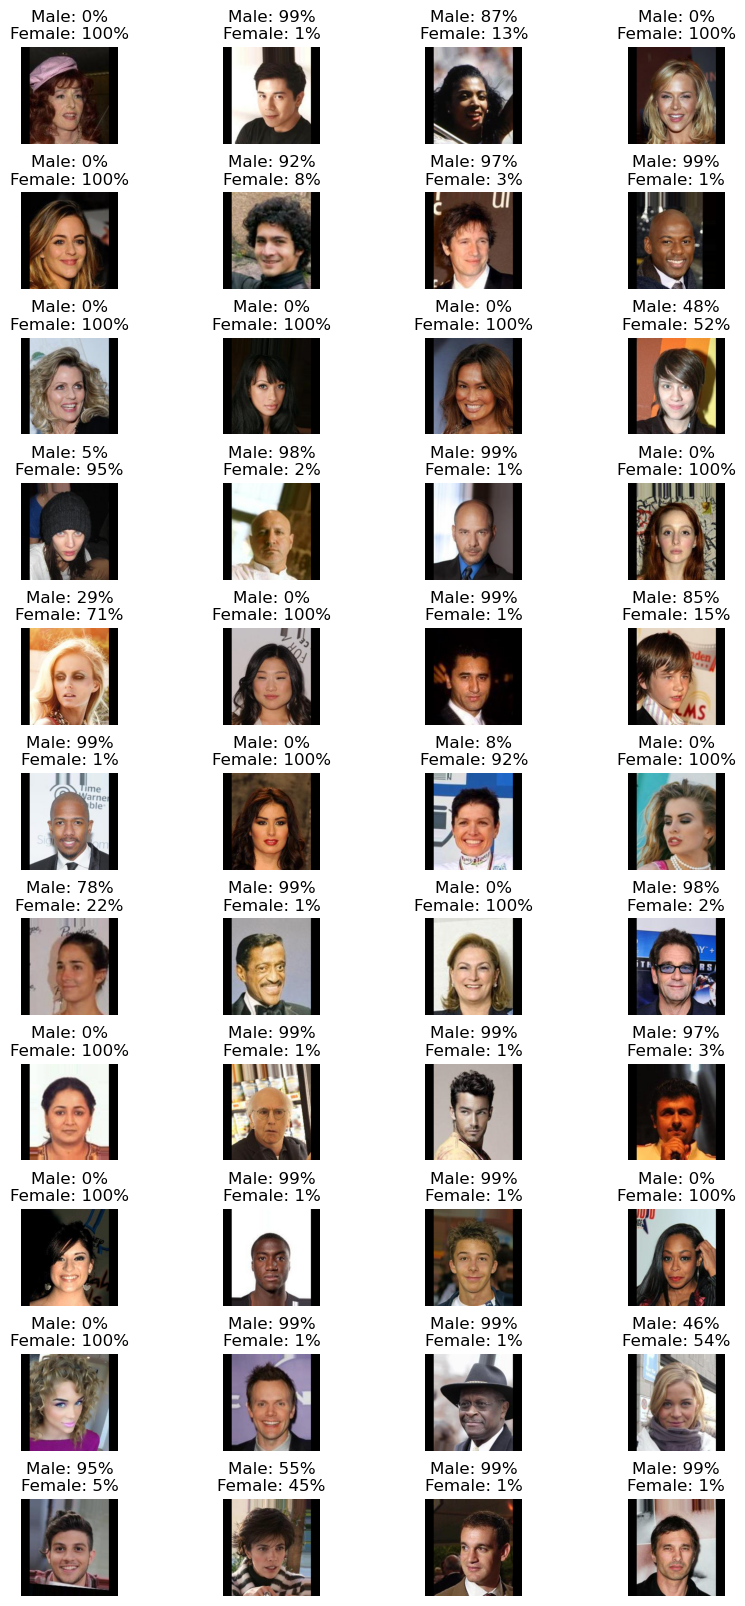

In [55]:
folder_path = 'dataset/predict/'
file_names = os.listdir(folder_path)

plt.figure(figsize=(10, int(len(file_names)/4)*2))

i = 1
for file in file_names:
    img_path = os.path.join(folder_path, file)
    image = load_img(f'{img_path}')
    width, height = image.size
    target_size = (256, 256)
    if(width > height): image = image.resize((target_size[0], int(height/(width/target_size[0]))))
    else: image = image.resize((int(width/(height/target_size[1])), target_size[1]))
    width, height = image.size
    resized_image = Image.new("RGB", target_size, (0, 0, 0))
    resized_image.paste(image, ((target_size[0] - width) // 2, (target_size[1] - height) // 2))
    image_array = img_to_array(resized_image)
    image_array = np.expand_dims(resized_image, axis=0)
    result = cnn.predict(image_array/255.0) 
    plt.subplot(int(len(file_names)/4)+1, 4, i)
    plt.imshow(resized_image)
    plt.axis('off')
    plt.title(f'Male: {int(result*100)}%\nFemale: {100-int(result*100)}%')
    i = i+1

    
plt.subplots_adjust(hspace=0.5)
plt.show()